In [99]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = '\%'
else:
    pct = '%'
from astroML.stats.random import bivariate_normal
from astroML.utils.decorators import pickle_results

<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
C:\Users\ricca\AppData\Local\Temp\ipykernel_15032\4016456516.py:5: SyntaxWarning: invalid escape sequence '\%'
  pct = '\%'


In [103]:
# Set parameters for the distributions
Nbootstraps = 5000
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.05 # outliers fraction

In [106]:
# sample the distribution
# without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5,45 * np.pi / 180., int(f * N)) + np.random.uniform(-10, 10, (int(f * N), 2))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)

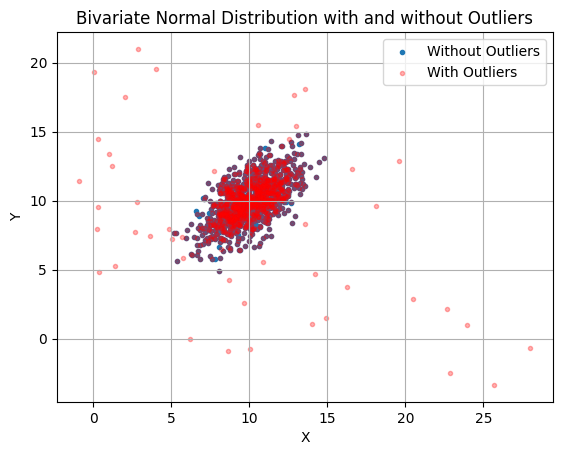

In [107]:
plt.scatter(X[:, 0], X[:, 1], marker='.', alpha=1, label='Without Outliers')
plt.scatter(X_out[:, 0], X_out[:, 1], marker='.', alpha=0.3, color='red', label='With Outliers')
plt.title('Bivariate Normal Distribution with and without Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

In [108]:
from scipy import stats

In [109]:
@pickle_results('fig_correlations_dump.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.pearsonr,
                                           stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]

    return results

In [110]:
results = compute_results(N, Nbootstraps)

@pickle_results: using precomputed results from 'fig_correlations_dump.pkl'


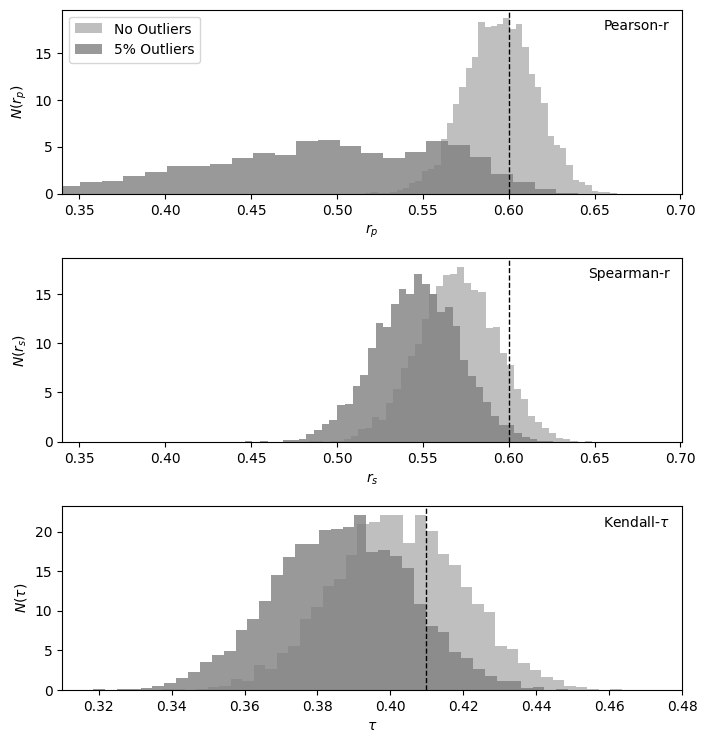

In [111]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.35)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100), pct)))

distributions = ['Pearson-r', 'Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_p', 'r_s', r'\tau']\

for i in range(3):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',
                density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i < 2:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.701)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.31, 0.48)
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes)

    ax.set_xlabel('$%s$' % xlabels[i])
    ax.set_ylabel('$N(%s)$' % xlabels[i])

In [146]:
def truncated_exp_inverse(u):
    # Normalization constant Z
    Z = np.exp(-1) - np.exp(-2)
    # Apply inverse CDF
    return -np.log(np.exp(-1) - u * Z)

# Inverse sampling
n_samples = 10000
u = np.random.uniform(0, 1, size=n_samples)
samples = truncated_exp_inverse(u)

# Plot results
x = np.linspace(1, 2, 500)
pdf = np.exp(-x) / (np.exp(-1) - np.exp(-2))

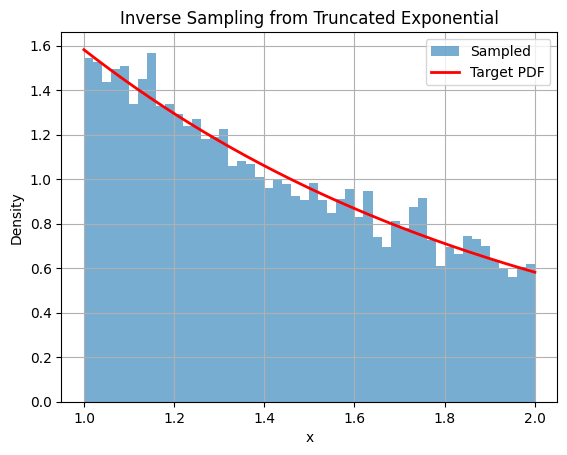

In [147]:
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled')
plt.plot(x, pdf, 'r-', lw=2, label='Target PDF')
plt.title("Inverse Sampling from Truncated Exponential")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)